# Homework 1                                                                                                                                                                                                                                BENNACER / BRAULT

In [1348]:
import numpy as np
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
from strategy2 import Strategy

In [1390]:
data = pd.read_excel('https://www.oliviergueant.com/uploads/4/3/0/9/4309511/sbf120_as_of_end_2018.xlsx',sheet_name= 'Data')

We will start by cleaning the data and then we will extract the market capitalisation from December 31ft, 2018.

In [1350]:
#list of dataframe chaque df = date + mk
df_mkt_cap_list = []
for i in tqdm(range(120)):
    mkt_cap_data = data.iloc[:,[3*i,3*i+2]].copy()
    mkt_cap_data.dropna(inplace = True)
    mkt_cap_data.iloc[:,0] = pd.to_datetime(mkt_cap_data.iloc[:,0], unit= 'D', origin= '1899-12-30') #conversion of excel dates
    mkt_cap_data.rename(columns = {mkt_cap_data.columns[0] : 'Date', mkt_cap_data.columns[1]: mkt_cap_data.columns[0]}, inplace = True) #renames the columns with name and mkt  
    mkt_cap_data.set_index('Date', inplace = True)
    df_mkt_cap_list.append(mkt_cap_data)


mkt_cap_data

#merges each dataframe according to dates 
agg_mkt_cap_data = df_mkt_cap_list[0]
for df in tqdm(df_mkt_cap_list[1:]):
   agg_mkt_cap_data = agg_mkt_cap_data.join(df, how='outer', sort = True)  

n=10
top = agg_mkt_cap_data[(agg_mkt_cap_data.index == '31-12-2018')].transpose().nlargest(n,columns = '2018-12-31').copy() #We select the data from Dec 31ft 2018

100%|██████████| 119/119 [00:00<00:00, 638.68it/s]
/usr/local/lib/python3.9/site-packages/pandas/core/arraylike.py:40: UserWarning: Parsing '31-12-2018' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  return self._cmp_method(other, operator.eq)


We get the ten stocks corresponding to those having the highest market capitalisation as of end 2018. 

In [1351]:
top.transpose()

,MC FP Equity,TTE FP Equity,OR FP Equity,SAN FP Equity,AIR FP Equity,KER FP Equity,RMS FP Equity,BNP FP Equity,EL FP Equity,AI FP Equity
Date,,,,,,,,,,
2018-12-31,130414.5455,124001.7374,112743.5012,94825.2974,65183.8473,51976.5689,51180.0509,49335.7982,47106.2711,46453.6329


Now that we know which stocks we consider, let's reorganise the data and extract their results for the year 2019. 

In [1352]:
price_df_list = []
for i in tqdm(range(120)):
    price_data = data.iloc[:,3*i:3*i+2].copy()
    price_data.dropna(inplace=True)
    price_data.iloc[:,0] = pd.to_datetime(price_data.iloc[:,0], unit= 'D', origin= '1899-12-30')
    price_data.rename(columns = {price_data.columns[0] : 'Date', price_data.columns[1]: price_data.columns[0]}, inplace = True)
    price_data.set_index('Date', inplace = True)
    price_df_list.append(price_data)


agg_price_data = price_df_list[0]
for df in tqdm(price_df_list[1:]):
    agg_price_data = agg_price_data.join(df, how='outer', sort = True)

100%|██████████| 119/119 [00:00<00:00, 730.88it/s]


We need to get the prices of the 10 stocks we consider over the year 2019. 

In [1353]:
agg_price_data1 = agg_price_data[(agg_price_data.index >= '2018-12-31') & (agg_price_data.index <= '2019-12-31')].copy() #Selects the year 2019

top10 = pd.concat([top.T, agg_price_data1], join = 'inner') #Selects the 10 stocks we consider in 2019
top10 = top10.drop(top10.index[[1]]) #it starts 2nd of January as the 1ft is a holyday
top10

,MC FP Equity,TTE FP Equity,OR FP Equity,SAN FP Equity,AIR FP Equity,KER FP Equity,RMS FP Equity,BNP FP Equity,EL FP Equity,AI FP Equity
Date,,,,,,,,,,
2019-01-02,253.30,46.655,199.60,75.40,84.17,402.8,477.6,39.085,110.70,96.4545
2019-01-03,243.65,46.255,197.20,74.66,81.21,380.7,464.0,38.855,109.65,94.6818
2019-01-04,251.15,47.410,200.00,75.34,85.12,397.4,477.8,40.740,110.80,97.3182
2019-01-07,250.70,47.300,197.45,73.84,83.56,396.4,472.2,40.680,110.60,96.7727
2019-01-08,258.55,47.200,198.65,74.42,86.65,410.5,479.9,40.885,111.20,96.9091
...,...,...,...,...,...,...,...,...,...,...
2019-12-23,413.80,49.355,265.30,90.71,132.78,582.0,676.6,53.110,138.15,126.4500
2019-12-24,414.10,49.475,264.50,90.63,133.14,587.4,678.0,52.980,138.60,126.0000
2019-12-27,417.60,49.290,266.10,90.84,133.28,590.7,677.4,52.970,139.15,126.8500


# I-EQUALLY WEIGHTED PORTFOLIO

First, we need to create a dataframe with the daily returns of each stock we consider. 

In [1354]:
ret = top10.pct_change().dropna()
ret

,MC FP Equity,TTE FP Equity,OR FP Equity,SAN FP Equity,AIR FP Equity,KER FP Equity,RMS FP Equity,BNP FP Equity,EL FP Equity,AI FP Equity
Date,,,,,,,,,,
2019-01-03,-0.038097,-0.008574,-0.012024,-0.009814,-0.035167,-0.054866,-0.028476,-0.005885,-0.009485,-0.018379
2019-01-04,0.030782,0.024970,0.014199,0.009108,0.048147,0.043867,0.029741,0.048514,0.010488,0.027845
2019-01-07,-0.001792,-0.002320,-0.012750,-0.019910,-0.018327,-0.002516,-0.011720,-0.001473,-0.001805,-0.005605
2019-01-08,0.031312,-0.002114,0.006077,0.007855,0.036979,0.035570,0.016307,0.005039,0.005425,0.001409
2019-01-09,0.011603,0.013347,-0.008054,-0.003897,0.034968,0.023386,0.023547,-0.002690,0.004496,-0.013602
...,...,...,...,...,...,...,...,...,...,...
2019-12-23,0.008039,0.005808,0.002267,-0.001651,0.006824,0.003275,0.007145,-0.008402,0.004727,-0.003546
2019-12-24,0.000725,0.002431,-0.003015,-0.000882,0.002711,0.009278,0.002069,-0.002448,0.003257,-0.003559
2019-12-27,0.008452,-0.003739,0.006049,0.002317,0.001052,0.005618,-0.000885,-0.000189,0.003968,0.006746


For each row, in other words, for each stock, we compute the mean of returns. 

In [1355]:
ret.mean(axis=1)

Date
2019-01-03   -0.022077
2019-01-04    0.028766
2019-01-07   -0.007822
2019-01-08    0.014386
2019-01-09    0.008310
                ...   
2019-12-23    0.002449
2019-12-24    0.001057
2019-12-27    0.002939
2019-12-30   -0.011559
2019-12-31    0.000585
Length: 254, dtype: float64

Let's creat a list corresponding to the weight of each asset. 

In [1356]:
nbr_dasset = 10 
weights =[1/nbr_dasset for i in range(nbr_dasset)]
weights

[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]

To get the daily return of our Equally weighed portfolio, we multiplied the weight of each asset with the associated daily return from the dataframe. We call it weighted average return. 

In [1357]:
ret2 = ret.mul(weights, axis = "columns").sum(axis=1)

We compute the sharpe ratio of our equally weighed portfolio : 

In [1358]:
sharpe_EWP = Strategy("strat1", ret2)
sharpe_EWP.sharpe_ratio()

2.185928364040369

And its maximum drawdown as well : 

In [1359]:
mdd_EWP = Strategy(top10, ret2)
mdd_EWP.max_dd()

0.07191270295659913

CONCLUSION
---
SharpeRatio = 2,18 > 1. It means that the portfolio is profitable.  

MDD == 7%. It signifies that the maximum loss is significanly low. 


# II-Markowitz minimum-variance portfolio 

We still work with the same ten stocks. We select their prices over the years 2°17 and 2018 to compute the covariance matrix. 


In [1360]:
agg_price_data2 = agg_price_data[(agg_price_data.index >= '2016-12-31') & (agg_price_data.index <= '2018-12-31')].copy() #prices 2017-2018

top2 = pd.concat([top.T, agg_price_data2], join = 'inner') 
top2 = top2.drop(top2.index[[0]])
top2

,MC FP Equity,TTE FP Equity,OR FP Equity,SAN FP Equity,AIR FP Equity,KER FP Equity,RMS FP Equity,BNP FP Equity,EL FP Equity,AI FP Equity
Date,,,,,,,,,,
2017-01-02,181.80,48.800,173.45,77.84,62.82,201.39,390.830,60.350,107.30,87.1074
2017-01-03,179.70,48.930,170.15,78.30,63.50,199.06,389.144,61.920,106.30,87.3140
2017-01-04,178.10,48.905,169.85,78.30,63.40,196.41,386.021,62.800,105.40,87.2314
2017-01-05,176.95,48.930,170.30,78.27,64.60,194.83,384.732,62.220,105.40,87.2727
2017-01-06,179.25,48.770,170.25,76.69,65.14,197.95,387.409,62.490,105.80,87.6446
...,...,...,...,...,...,...,...,...,...,...
2018-12-20,250.10,45.895,201.60,76.15,83.33,399.90,473.300,39.400,109.95,97.0909
2018-12-21,253.45,46.045,200.70,75.68,83.10,396.10,475.400,39.500,110.35,97.8182
2018-12-24,245.15,45.230,197.65,74.24,81.63,387.00,463.500,38.790,109.65,97.0909


Plot Growth of Investments over Total Dataset stating at 100 dollars
---
Let's do a graph to visualise the data we are working with. 

<AxesSubplot:xlabel='Date'>

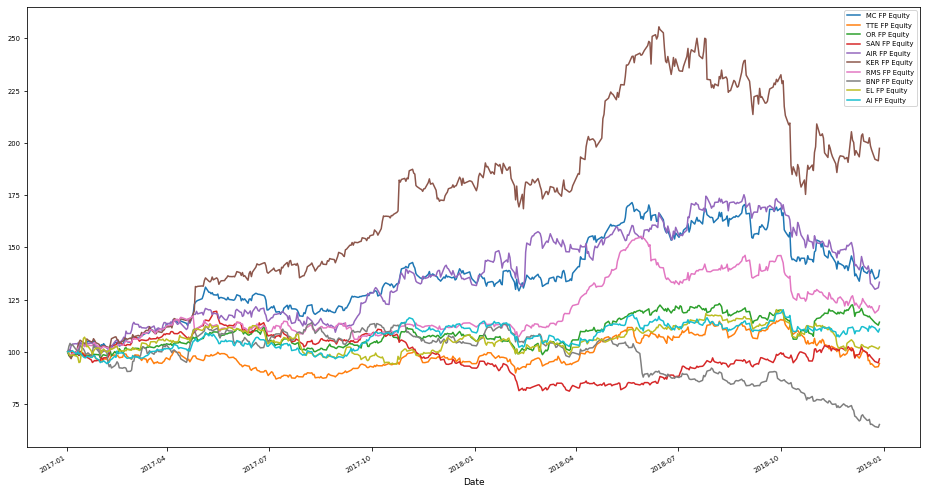

In [1361]:
(top2/top2.iloc[0]*100).plot(figsize =(16,9))

Means return __ Average trading day per years (annualized)


To compute the returns, we compose by the logarithm function and we divide by the previous data. 

In [1362]:
returns = np.log(top2 / top2.shift(1))
#divide by the previous amont
mean_returns = returns.mean()*252
#average trading day per years
mean_returns

MC FP Equity     0.163450
TTE FP Equity   -0.028396
OR FP Equity     0.065918
SAN FP Equity   -0.016984
AIR FP Equity    0.142708
KER FP Equity    0.337299
RMS FP Equity    0.098629
BNP FP Equity   -0.211834
EL FP Equity     0.011199
AI FP Equity     0.051264
dtype: float64

Covariance matrix of the 10 stocks between 2017 and 2018
---
We annualise the daily returns and get the following result : 

In [1363]:
cov_mat = returns.cov()*252
cov_mat

,MC FP Equity,TTE FP Equity,OR FP Equity,SAN FP Equity,AIR FP Equity,KER FP Equity,RMS FP Equity,BNP FP Equity,EL FP Equity,AI FP Equity
MC FP Equity,0.047109,0.015324,0.020646,0.010816,0.025755,0.044455,0.021943,0.016350,0.016094,0.019898
TTE FP Equity,0.015324,0.026709,0.009062,0.009010,0.014914,0.012931,0.006808,0.015259,0.007403,0.012886
OR FP Equity,0.020646,0.009062,0.026951,0.011322,0.015045,0.021214,0.012493,0.007749,0.012327,0.013138
SAN FP Equity,0.010816,0.009010,0.011322,0.026756,0.011063,0.007878,0.005315,0.009737,0.008653,0.011226
AIR FP Equity,0.025755,0.014914,0.015045,0.011063,0.056541,0.027748,0.013451,0.019021,0.014097,0.021001
KER FP Equity,0.044455,0.012931,0.021214,0.007878,0.027748,0.075714,0.025532,0.013161,0.015047,0.020935
RMS FP Equity,0.021943,0.006808,0.012493,0.005315,0.013451,0.025532,0.027027,0.006399,0.008954,0.009643
BNP FP Equity,0.016350,0.015259,0.007749,0.009737,0.019021,0.013161,0.006399,0.042677,0.008256,0.014934
EL FP Equity,0.016094,0.007403,0.012327,0.008653,0.014097,0.015047,0.008954,0.008256,0.035362,0.011033
AI FP Equity,0.019898,0.012886,0.013138,0.011226,0.021001,0.020935,0.009643,0.014934,0.011033,0.025713


Correlation 
---
Let's check if our data are correlated (>0.5). 

In [1364]:
corr = returns.corr()
corr

,MC FP Equity,TTE FP Equity,OR FP Equity,SAN FP Equity,AIR FP Equity,KER FP Equity,RMS FP Equity,BNP FP Equity,EL FP Equity,AI FP Equity
MC FP Equity,1.000000,0.432017,0.579437,0.304663,0.499029,0.744355,0.614974,0.364638,0.394323,0.571703
TTE FP Equity,0.432017,1.000000,0.337763,0.337033,0.383786,0.287555,0.253400,0.451966,0.240879,0.491698
OR FP Equity,0.579437,0.337763,1.000000,0.421622,0.385417,0.469620,0.462898,0.228485,0.399311,0.499069
SAN FP Equity,0.304663,0.337033,0.421622,1.000000,0.284430,0.175027,0.197651,0.288146,0.281295,0.427977
AIR FP Equity,0.499029,0.383786,0.385417,0.284430,1.000000,0.424090,0.344096,0.387212,0.315269,0.550771
KER FP Equity,0.744355,0.287555,0.469620,0.175027,0.424090,1.000000,0.564410,0.231535,0.290808,0.474459
RMS FP Equity,0.614974,0.253400,0.462898,0.197651,0.344096,0.564410,1.000000,0.188429,0.289652,0.365789
BNP FP Equity,0.364638,0.451966,0.228485,0.288146,0.387212,0.231535,0.188429,1.000000,0.212514,0.450813
EL FP Equity,0.394323,0.240879,0.399311,0.281295,0.315269,0.290808,0.289652,0.212514,1.000000,0.365902
AI FP Equity,0.571703,0.491698,0.499069,0.427977,0.550771,0.474459,0.365789,0.450813,0.365902,1.000000


Weights equal =1
---
To respect theory, let's show that the sum of weights is equal to 1. 

In [1365]:
print(np.sum(weights))

1.0


Return of Portfolio
---
We now compute the return of the portfolio. 

In [1366]:
returnpot = np.sum(weights *returns.mean())*252
returnpot

0.06132541707972234

And its volatility. 

In [1367]:
volport = np.sqrt(np.dot(weights, np.dot(returns.cov()*252, weights)))
volport

0.13047644160505148

Simulation of 1000 random combinaisons of portfolio
---
Let's analize their returns and their respective risk. 

In [1368]:
p_ret = [] #Return list
p_vol = [] #volatility list
p_SR = [] #Sharpe Ratio
p_wt = [] #weight for each portfolio

for x in range (1000):
    p_weights = np.random.random(10)
    p_weights /= np.sum(p_weights)
    
    ret_1 = np.sum(p_weights * returns.mean())*252
    p_ret.append(ret_1)
    
    vol_1 = np.sqrt(np.dot(p_weights,np.dot(returns.cov()*252, p_weights)))
    p_vol.append(vol_1)
    
    SR_1 = (ret_1 )/vol_1
    p_SR.append(SR_1)
    
    p_wt.append(p_weights)

p_ret = np.array(p_ret)
p_vol = np.array(p_vol)
p_SR= np.array(p_SR)
p_wt = np.array(p_wt)

p_ret, p_vol, p_SR, p_wt

(array([ 0.08689213,  0.06175587,  0.01913506,  0.03889925,  0.08563017,
         0.04547108,  0.0123936 ,  0.08029064,  0.092498  ,  0.0703555 ,
         0.1031256 ,  0.03687095,  0.07242413,  0.06896075,  0.02192538,
         0.06632017,  0.04210824,  0.02844814,  0.07916733,  0.05017871,
         0.06796243,  0.09362952,  0.06309216,  0.06236716,  0.09473681,
         0.03569703,  0.10056846,  0.09178786,  0.09932074,  0.07075201,
         0.06483349,  0.04446238,  0.08885123,  0.01696228,  0.07313848,
         0.06329442,  0.09286168,  0.05972024,  0.06318439,  0.09915932,
         0.06032514,  0.05329912,  0.01694066,  0.07979322,  0.07420356,
         0.05311882,  0.08603109,  0.01783502,  0.0619126 ,  0.0575193 ,
         0.05827353,  0.02958907,  0.06770591,  0.06248853,  0.12477315,
         0.02537709,  0.08373005,  0.03595621,  0.03968592,  0.05008624,
         0.0444239 ,  0.08190985,  0.04232928,  0.03366431,  0.10123183,
         0.04148605,  0.0867878 ,  0.09624308,  0.0

Plotting the Efficient Frontier
---
We decide to plot the efficient frontier of our 1000 portfolios. 

<AxesSubplot:xlabel='Volatility', ylabel='Return'>

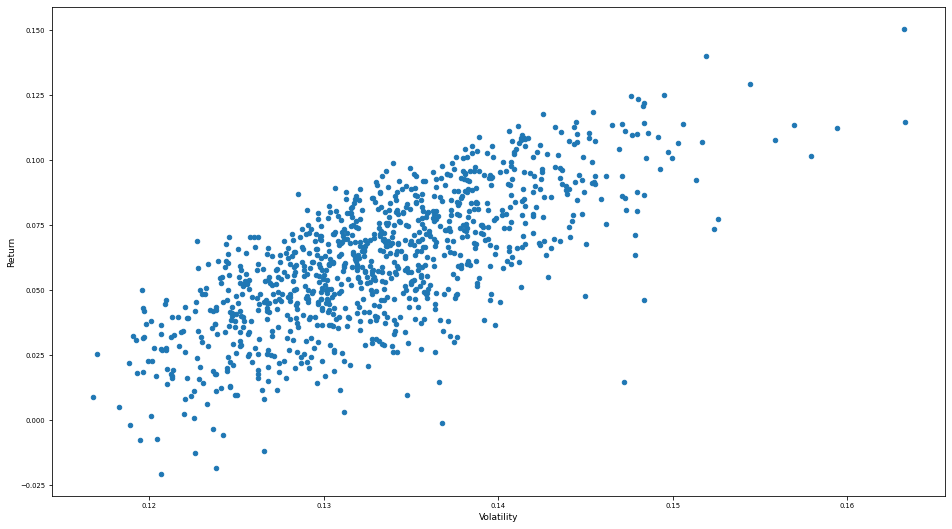

In [1369]:
ports = pd.DataFrame({'Return': p_ret, 'Volatility': p_vol})
ports.plot(x='Volatility', y = 'Return', kind = 'scatter', figsize=(16,9))


OPTIMIZE PORTFOLIO

To optimise our portfolio, we choose the one with the highest return and the smallest volatility which means the one withe highest Sharpe-Ratio. 

In [1370]:
SR_INDex = np.argmax(p_SR)
wei=[]

i = 0
while i <10:
    print("Stock : %s : %2.2f" % (top2.columns[i],(p_wt[SR_INDex][i]*100)))
    wei.append(p_wt[SR_INDex][i]) #On met le poids efficient dans une serie
    i += 1
print("\nVola :", p_vol[SR_INDex]) #Find volatility for the optimize portfolio
print("\nreturn :", p_ret[SR_INDex]) 
print(wei)


Stock : MC FP Equity : 1.62
Stock : TTE FP Equity : 7.28
Stock : OR FP Equity : 13.26
Stock : SAN FP Equity : 1.95
Stock : AIR FP Equity : 6.81
Stock : KER FP Equity : 28.76
Stock : RMS FP Equity : 28.20
Stock : BNP FP Equity : 2.93
Stock : EL FP Equity : 5.09
Stock : AI FP Equity : 4.11

Vola : 0.15192471727922577

return : 0.14000772693195318


list

In [1387]:
#Return de notre portfolio efficient 
rett = returns.dot(wei)
rett = rett.dropna()

Sharpe Ratio 
--- 

Explicit computation of the shapre ratio : 

In [1388]:
mrk_Sr = Strategy("strat 2", rett)
mrk_Sr.sharpe_ratio()

0.922468286307012

Maximum DrawDown
---

In [1389]:
maxdd = Strategy("strat 2", rett)
maxdd.max_dd()

0.1854583786853511

Conclusion 
---
Sharpe ratio in [0,1]. It means that the portfolio is not interesting.  

MDD between 15% and 25% (depends  on the randomness). The investor experienced a variation of about 18% between the highest value and the lowest value of his portfolio.



# Equally Risk Contribution (ERC)

In [1374]:
import pandas_datareader.data as web
import datetime
from scipy.optimize import minimize
TOLERANCE = 1e-10

In [1375]:
#Let's define the risk of the weights distribution
def allocation_risk(weights, cov_mat): 
    prtf_risk = np.sqrt((weights * cov_mat * weights.T))[0, 0]
    return prtf_risk #It returns the risk of the weights distribution

In [1376]:
#Let's compute the contribution of each asset to the risk of the weights distribution
def assets_rc_to_allocation_risk(weights, cov_mat):
    prtf_risk = allocation_risk(weights, cov_mat) #risk of the weights distribution
    arc = np.multiply(weights.T, covariances * weights.T) \
    / prtf_risk
    return arc #It returns the contribution of each asset to the risk of the weights distribution


In [1377]:
def risk_budget_objective_error(weights, args):
    cov_mat = args[0] #The covariance matrix is the first element in the variable 
    assets_risk_budget = args[1] #The desired contribution of each asset to the portfolio risk is the second element
    weights = np.matrix(weights) #We transform the weights into a matrix
    prtf_risk = allocation_risk(weights, cov_mat) #risk of the weights distribution
    arc = \
    assets_rc_to_allocation_risk(weights, cov_mat) #contribution of each asset to the risk of the weights distribution
    assets_risk_target = \
    np.asmatrix(np.multiply(prtf_risk, assets_risk_budget)) #We compute the desired contribution of each asset to the risk of the weights distribution
    error = \
    sum(np.square(arc - assets_risk_target.T))[0, 0] #Error between the desired contribution and the calculated contribution of each asset
    return error #It returns the calculated error

In [1378]:
def risk_parity_weights(cov_mat, assets_risk_budget, initial_weights):
    constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1.0},
                   {'type': 'ineq', 'fun': lambda x: x}) #We consider only long positions whose sum equals 100%
    # Optimisation process in scipy
    opt_result = minimize(fun= risk_budget_objective_error, x0=initial_weights, args=[cov_mat, assets_risk_budget], method='SLSQP',
                               constraints=constraints, tol=TOLERANCE, options={'disp': False})
    weights = opt_result.x #Recovery of the weights from the optimised object
    return weights #It returns the optimised weights

In [1379]:
#Dataframe qu'avec les Top10 entre 2017-2018
agg_price_data2 = agg_price_data[(agg_price_data.index >= '2017-01-01') & (agg_price_data.index <= '2018-12-31')].copy() 
#Sélectionne les prix de l'année 2017-2018

top2 = pd.concat([top.T, agg_price_data2], join = 'inner') 
#Sélectionne les résultats de 2017-2018 des 10 meilleurs market cap de 2018
top2 = top2.drop(top2.index[[0]])
top2

,MC FP Equity,TTE FP Equity,OR FP Equity,SAN FP Equity,AIR FP Equity,KER FP Equity,RMS FP Equity,BNP FP Equity,EL FP Equity,AI FP Equity
Date,,,,,,,,,,
2017-01-02,181.80,48.800,173.45,77.84,62.82,201.39,390.830,60.350,107.30,87.1074
2017-01-03,179.70,48.930,170.15,78.30,63.50,199.06,389.144,61.920,106.30,87.3140
2017-01-04,178.10,48.905,169.85,78.30,63.40,196.41,386.021,62.800,105.40,87.2314
2017-01-05,176.95,48.930,170.30,78.27,64.60,194.83,384.732,62.220,105.40,87.2727
2017-01-06,179.25,48.770,170.25,76.69,65.14,197.95,387.409,62.490,105.80,87.6446
...,...,...,...,...,...,...,...,...,...,...
2018-12-20,250.10,45.895,201.60,76.15,83.33,399.90,473.300,39.400,109.95,97.0909
2018-12-21,253.45,46.045,200.70,75.68,83.10,396.10,475.400,39.500,110.35,97.8182
2018-12-24,245.15,45.230,197.65,74.24,81.63,387.00,463.500,38.790,109.65,97.0909


In [1380]:
#mean and variance of the (log) returns of the different securities
top2 = np.log(top2 / top2.shift(-1))
top2

,MC FP Equity,TTE FP Equity,OR FP Equity,SAN FP Equity,AIR FP Equity,KER FP Equity,RMS FP Equity,BNP FP Equity,EL FP Equity,AI FP Equity
Date,,,,,,,,,,
2017-01-02,0.011618,-0.002660,0.019209,-0.005892,-0.010766,0.011637,0.004323,-0.025682,0.009363,-0.002369
2017-01-03,0.008944,0.000511,0.001765,0.000000,0.001576,0.013402,0.008058,-0.014112,0.008503,0.000946
2017-01-04,0.006478,-0.000511,-0.002646,0.000383,-0.018751,0.008077,0.003345,0.009279,0.000000,-0.000473
2017-01-05,-0.012914,0.003275,0.000294,0.020393,-0.008324,-0.015887,-0.006934,-0.004330,-0.003788,-0.004252
2017-01-06,-0.009439,0.014145,-0.006440,-0.010765,-0.002147,-0.015838,-0.001664,0.021023,0.005212,0.012812
...,...,...,...,...,...,...,...,...,...,...
2018-12-20,-0.013306,-0.003263,0.004474,0.006191,0.002764,0.009548,-0.004427,-0.002535,-0.003631,-0.007463
2018-12-21,0.033296,0.017859,0.015313,0.019211,0.017848,0.023242,0.025350,0.018138,0.006364,0.007463
2018-12-24,-0.008125,-0.002650,0.010426,0.006487,-0.005741,0.003884,-0.012436,0.006336,0.007782,0.018427


In [1381]:
#Matrice de covariance des 10 stocks entre 2017-201
#We use a factor of 252 trading days to annualize the daily returns
cov_mat = top2.cov()*252
cov_mat

,MC FP Equity,TTE FP Equity,OR FP Equity,SAN FP Equity,AIR FP Equity,KER FP Equity,RMS FP Equity,BNP FP Equity,EL FP Equity,AI FP Equity
MC FP Equity,0.047109,0.015324,0.020646,0.010816,0.025755,0.044455,0.021943,0.016350,0.016094,0.019898
TTE FP Equity,0.015324,0.026709,0.009062,0.009010,0.014914,0.012931,0.006808,0.015259,0.007403,0.012886
OR FP Equity,0.020646,0.009062,0.026951,0.011322,0.015045,0.021214,0.012493,0.007749,0.012327,0.013138
SAN FP Equity,0.010816,0.009010,0.011322,0.026756,0.011063,0.007878,0.005315,0.009737,0.008653,0.011226
AIR FP Equity,0.025755,0.014914,0.015045,0.011063,0.056541,0.027748,0.013451,0.019021,0.014097,0.021001
KER FP Equity,0.044455,0.012931,0.021214,0.007878,0.027748,0.075714,0.025532,0.013161,0.015047,0.020935
RMS FP Equity,0.021943,0.006808,0.012493,0.005315,0.013451,0.025532,0.027027,0.006399,0.008954,0.009643
BNP FP Equity,0.016350,0.015259,0.007749,0.009737,0.019021,0.013161,0.006399,0.042677,0.008256,0.014934
EL FP Equity,0.016094,0.007403,0.012327,0.008653,0.014097,0.015047,0.008954,0.008256,0.035362,0.011033
AI FP Equity,0.019898,0.012886,0.013138,0.011226,0.021001,0.020935,0.009643,0.014934,0.011033,0.025713


In [1384]:
#we want all asset to contribute equally to the portfolio risk
assets_risk_budget = [1 / agg_price_data2.shape[1]] * agg_price_data2.shape[1]

#We need the initial weights to be equally weighted
nbr_dasset = 10 
init_weights =[1/nbr_dasset for i in range(nbr_dasset)]
#We optimise the weights according to the function created above 
weights = \
risk_parity_weights(cov_mat, assets_risk_budget, init_weights)


#IL Y A UN PROBLEME DE DIMENSION, ON A BIEN COMPRIS QU'ON NE POUVAIT PAS FAIRE CE PRODUIT 
#MATRICIEL MAIS NOUS N'AVONS PAS RÉUSSI A LE RECTIFIER. 

ValueError: Unable to coerce to Series, length must be 10: given 1

# Graph des PnL
Compilez à partir d'ici

Finally, let's plot the graph of the three PnL trajectories : 

In [ ]:
import matplotlib.pyplot as plt

fontsize = 9
width_in_cm = 14.
params = {'figure.figsize': (width_in_cm / 2.54, width_in_cm / 2.54 * 9./16.),
          'axes.labelsize': fontsize,
          'axes.titlesize': fontsize,
          'xtick.labelsize': fontsize*0.75,
          'ytick.labelsize': fontsize*0.75,
          'legend.fontsize': fontsize*0.75}
plt.rcParams.update(params)

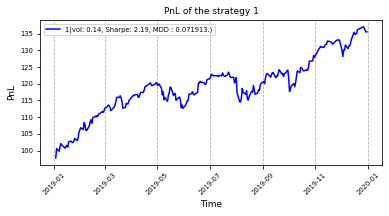

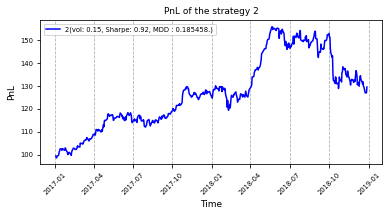

In [1385]:
graph = Strategy("1",ret2)
graph2= Strategy("2",rett)
graph = graph.illustrate()
graph2 = graph2.illustrate()